# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Определим рыночную стоимость объектов недвижимости.  

### Открытие файла с данными, общая информация 

#### Загрузка данных

In [1]:
#импортируем библиотеку pandas
import pandas as pd 
#читаем файл csv
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')

#### Общая информаиция о датафрейме

In [2]:
#изучаем файл, выводим первые 15 строк датафрейма на экран
pd.set_option('display.max_columns', None)
data.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
#выводим основную информацию о датафрейме с помощью метода info()
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

#### Гистограммы для всех столбцов

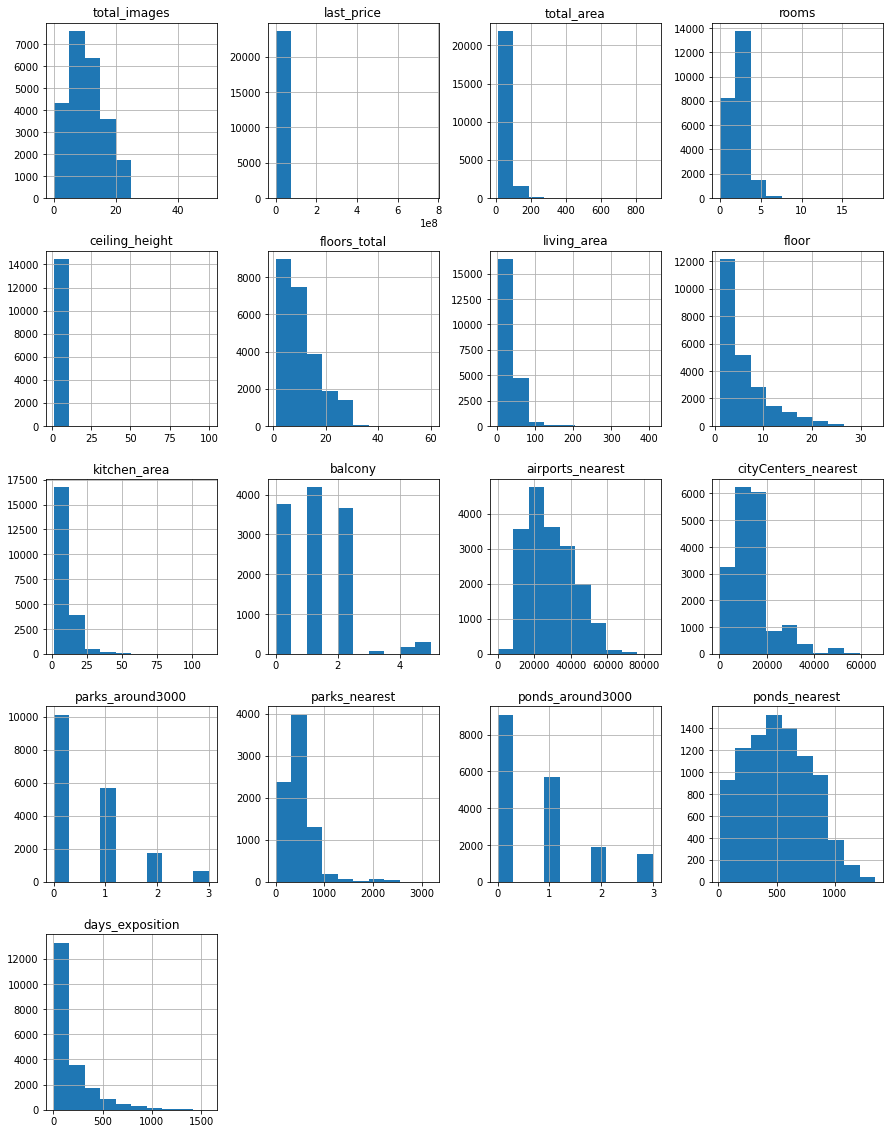

In [4]:
#выводим общую гистограмму для численных столбцов таблицы
data.hist(figsize=(15, 20));

Файл для выполнения задания содержит данные о продаже квартир в Санкт-петербурге и соседних населенных пунктах (таких как Ломоносов, Петергоф, Пушкин и др). Датафрейм состоит из 22 столбцов (таких как дата публикации, название населенного пункта, общая площадь квартиры и др) и порядка 23 тысяч строк.
Гистограммы дают общее представление о столбцах. Проведем анализ данных в столбцах после обработки пропусков и аномальных значений. 

### Предобработка данных

#### Пропущенные значения

In [5]:
#выведем количество пропущенных значений для каждого столбца
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [6]:
#пропуски значений в "балконы", вероятно, связаны с тем, что пользователи с квратирами "без балкона" просто не выбрали вариант "0" балконов
#создадим список из значений столбца "балконы". переберем элементы циклом for. проведем замену значений Nan на ноль
balcony_replace = ['balcony']
for d in balcony_replace:
    data[d] = data[d].fillna(0)

In [7]:
#пропуски есть также в floors_total. данные столбец нужен нам для дальнейшей работы. удалим строки с отсутствующими значениями
data = data.dropna(subset = ['floors_total'])

#проверим, как изменилось количество пропусков после наших изменений
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9118
floors_total                0
living_area              1870
floor                       0
is_apartment            20838
studio                      0
open_plan                   0
kitchen_area             2231
balcony                     0
locality_name              48
airports_nearest         5532
cityCenters_nearest      5509
parks_around3000         5508
parks_nearest           15568
ponds_around3000         5508
ponds_nearest           14552
days_exposition          3172
dtype: int64

Таблица имеет пропуски в 12 из 22 столбцах:
- тип жилья: апартаменты/квартира = 20 924 пропуска из 23 613. 88% пропущенных данных. % потерянных данных и остаток значений слишком мал для анализа. не будем проводить исследования связанные с этим параметром.
- расстояние до ближайшего парка = 15 620 из 23 613. 66% пропущенных данных. % потери данных существеннен, но оставшихся данных достаточно для анализа
- расстояние до ближайшего водоема = 14 589 из 23 613. 62% пропущенных данных. % потери данных существеннен, но оставшихся данных достаточно для анализа
- расстояние до аэропорта =  5 542 из 23 613. 23% пропущенных данных. % потери данных существеннен, но оставшихся данных достаточно для анализа
- расстоние до центра города = 5 519 из 23 613. 23% пропущенных данных. % потери данных существеннен, но оставшихся данных достаточно для анализа
- кол-во парков в радиусе 3км = 5 518 из 23 613. 23% пропущенных данных. % потери данных существеннен, но оставшихся данных достаточно для анализа
- кол-во водоемов в радиусе 3 км = 5 518 из 23 613. 23% пропущенных данных. % потери данных существеннен, но оставшихся данных достаточно для анализа

Потерянные данные относятся к картографическим. Необходимо поставить задачу в it отдел, чтобы они проверили причины отсутствия данных, либо настроили их автоматический вывод (возможно, по данным населенным пунктам работы не были проведенены до конца, то есть, например, не настроен расчет расстояния до озера в "Ломоносово").

Отсутствие данных в столбце "аппартаменты" - относится к данным добавленным пользователем. Возможно, заполнение данного столбца не является обязательным при заполнении карточки объявления. Также данные о типе дома, возможно, есть в открытых источниках - возможно, it отдел сможет автоматически подтянуть эти данные к сервису. Необходимо это поправить, т.к. тип жилья является весомым фактором при выборе объекта и может иметь сильные взаимосвязи с другими параметрами объекта. 

#### Типы данных

Столбец first_day_exposition (дата публикации) имеет не подходящий, строковый, тип данных. На следующих этапах при обработке данных нам нужно будет забирать из этого столбца день, месяц, год - с типом данных "строка" это будет сделать невозможно. 
Сделаем также тип данных для floors_total (всего этажей в доме) на int - т.к. у этого столбца может быть только целочисленное значение.  

In [8]:
#заменим тип данных в first_day_exposition на datetime()
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')

#заменим тип данных в floors_total на int
data['floors_total'] = data['floors_total'].astype(int)

#заменим тип данных в float64 на float32 для экономии памяти
data['last_price'] = pd.to_numeric(data['last_price'], downcast='float')
data['total_area'] = pd.to_numeric(data['total_area'], downcast='float')
data['ceiling_height'] = pd.to_numeric(data['ceiling_height'], downcast='float')
data['living_area'] = pd.to_numeric(data['living_area'], downcast='float')
data['kitchen_area'] = pd.to_numeric(data['kitchen_area'], downcast='float')
data['balcony'] = pd.to_numeric(data['balcony'], downcast='float')
data['airports_nearest'] = pd.to_numeric(data['airports_nearest'], downcast='float')
data['cityCenters_nearest'] = pd.to_numeric(data['cityCenters_nearest'], downcast='float')
data['parks_around3000'] = pd.to_numeric(data['parks_around3000'], downcast='float')
data['parks_nearest'] = pd.to_numeric(data['parks_nearest'], downcast='float')
data['ponds_around3000'] = pd.to_numeric(data['ponds_around3000'], downcast='float')
data['ponds_nearest'] = pd.to_numeric(data['ponds_nearest'], downcast='float')
data['days_exposition'] = pd.to_numeric(data['days_exposition'], downcast='float')

#проверим еще раз типы данных через info()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23613 non-null  int64         
 1   last_price            23613 non-null  float32       
 2   total_area            23613 non-null  float32       
 3   first_day_exposition  23613 non-null  datetime64[ns]
 4   rooms                 23613 non-null  int64         
 5   ceiling_height        14495 non-null  float32       
 6   floors_total          23613 non-null  int64         
 7   living_area           21743 non-null  float32       
 8   floor                 23613 non-null  int64         
 9   is_apartment          2775 non-null   object        
 10  studio                23613 non-null  bool          
 11  open_plan             23613 non-null  bool          
 12  kitchen_area          21382 non-null  float32       
 13  balcony         

#### Неявные дубликаты

Датафрейм содержит только один столбец с названиями - locality_name (название населенного пункта). Проверим, содержит ли он неявные дубликаты. 

In [9]:
#выведем список уникальных значений названий населенных пунктов
data['locality_name'].unique() 

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [10]:
#обработаем не явные дубликаты. "городской посёлок Назия" и "поселок городского типа Назия" дубликаты
duplicates = ['городской посёлок Назия']
name = 'поселок городского типа Назия'
data['locality_name'] = data['locality_name'].replace(duplicates, name)

#"городской посёлок Рощино" и "посёлок городского типа Рощино" тоже очевидно дубликаты
duplicates = ['городской посёлок Рощино']
name = 'посёлок городского типа Рощино'
data['locality_name'] = data['locality_name'].replace(duplicates, name)

#"поселок городского типа Рябово" и "посёлок городского типа Рябово" - дубликаты
duplicates = ['поселок городского типа Рябово']
name = 'посёлок городского типа Рябово'
data['locality_name'] = data['locality_name'].replace(duplicates, name)

#выведем уникальные значения вновь для проверки 
data['locality_name'].unique() 

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

#### Аномальные значения

Посмотрим минимальные, максимальные и средние значения для всех столбцов датафрейма для выявления аномальных значений

In [11]:
#посмотрим все столбцы методом describe()
data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23613.0,9.874518e+00,5.681541e+00,0.0,6.00,9.00,1.400000e+01,5.000000e+01
last_price,23613.0,6.540556e+06,1.090172e+07,12190.0,3400000.00,4650000.00,6.799000e+06,7.630000e+08
total_area,23613.0,6.034068e+01,3.564899e+01,12.0,40.00,52.00,6.980000e+01,9.000000e+02
rooms,23613.0,2.071147e+00,1.078380e+00,0.0,1.00,2.00,3.000000e+00,1.900000e+01
ceiling_height,14495.0,2.771495e+00,1.261445e+00,1.0,2.52,2.65,2.800000e+00,1.000000e+02
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,1.600000e+01,6.000000e+01
living_area,21743.0,3.446278e+01,2.203743e+01,2.0,18.60,30.00,4.230000e+01,4.097000e+02
floor,23613.0,5.877313e+00,4.873539e+00,1.0,2.00,4.00,8.000000e+00,3.300000e+01
kitchen_area,21382.0,1.056413e+01,5.904316e+00,1.3,7.00,9.10,1.200000e+01,1.120000e+02
balcony,23613.0,5.930631e-01,9.603071e-01,0.0,0.00,0.00,1.000000e+00,5.000000e+00


- total_area - минимальное в 12кв. Выглядит выбивающимся значением. Оставим в датафрейме объекты с площадью от 17кв. Значение в 900кв так же выглядит выбивающимся - возможно в базу попали не жилые помещения;
- rooms - минимальное 0. Вероятно, это ошибки. Число комнат в квартире не может быть равно 0. Заменим 0 на 1. Максимальное значение в 19 также выглядит ошибкой;
- last_price. 75% процентиль приходится на 7млн. Максимальное значение в 7 млрд - аномальное. возможно, это нежилые помещения;
- ceiling_height - не может быть меньше 2,5м. Элитные дома могут иметь высоту до 4м. Удалим все значения за пределами этого диапазона.
- floors_total - 1(один) этаж это жилой дом, частный сектор. Мы исследуем данные о продаже квартир. Оставим только объекты с этажностью от 2 этажей.
- kitchen_area - максимальное значение 112 выглядит аномальным. оставим для анализа только объекты с площадью кухни до 40кв
- living_area - оставим данные с объектами с площадью от 12кв 
- days_exposition - значение 1 выглядит аномальным. похоже на ошибку загрузки. возможно, пользователь загрузил не то объявление и решил его удалить. на данном этапе нам помогла бы консультация с опытным риелтором - чтобы узнать минимально нормальное время продажи квартиры. по нашим данным первый квартиль равен 45. оставим для этого столбца значение больше 7 дней. 

In [12]:
#удалим в total_area все строки со значениями меньше 17 и больше 400
data = data.drop(data[data['total_area'] < 17].index)
data = data.drop(data[data['total_area'] > 400].index)

#заменим в rooms 0 на 1
for i in data['rooms']:
     if i == 0:
        data['rooms'] = data['rooms'].replace({i: 1})

#удалим все значени в rooms больше чем 7. мы удаляем их т.к. 75% процентиль приходится на 3. в Максимум = 19.
data = data.drop(data[data['rooms'] > 7].index)

#удалим из last_price все значения больше 100 000 000 (в купе с тем, что у нас есть объекты в 900кв метров - возможно, это не жилые помещения)
data = data.drop(data[data['last_price'] > 100000000].index)

#удалим все значени в ceiling_height меньшие чем 2,5 и большие, чем 4
data = data.drop(data[data['ceiling_height'] < 2.5].index) 
data = data.drop(data[data['ceiling_height'] > 4].index)

#удалим все значени в floors_total равные 1
data = data.drop(data[data['floors_total'] == 1].index)

#удалим в living_area все строки со значениями меньше 12
data = data.drop(data[data['living_area'] < 12].index)

#удалим в kitchen_area все строки со значениями больше 40
data = data.drop(data[data['kitchen_area'] > 40].index)

#удалим из days_exposition все строки со значениями меньше 7
data = data.drop(data[data['days_exposition'] < 7].index)

#посмотрим как изменились данные в датафрейме после работы с аномальными значениями
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22522 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22522 non-null  int64         
 1   last_price            22522 non-null  float32       
 2   total_area            22522 non-null  float32       
 3   first_day_exposition  22522 non-null  datetime64[ns]
 4   rooms                 22522 non-null  int64         
 5   ceiling_height        13792 non-null  float32       
 6   floors_total          22522 non-null  int64         
 7   living_area           20717 non-null  float32       
 8   floor                 22522 non-null  int64         
 9   is_apartment          2672 non-null   object        
 10  studio                22522 non-null  bool          
 11  open_plan             22522 non-null  bool          
 12  kitchen_area          20398 non-null  float32       
 13  balcony         

После обработки данных датафрейм сократился, но не существенно. 

### Добавление новых столбцов в таблицу

Проведем расчеты и добавим в таблицу новые столбцы необходимые для анализа данных.

In [13]:
#добавим в таблицу data цену за один квадратный метр
data['meter_area_price'] = round ((data['last_price'] / data['total_area']), 2)

#добавим в таблицу день недели публикации объявления
data['day_week'] = data['first_day_exposition'].dt.weekday

#добавим в таблицу столбец с месяцем публикации объявления
data['month'] = data['first_day_exposition'].dt.month 

#добавим в таблицу столбец с годом публикации объявления
data['year'] = data['first_day_exposition'].dt.to_period("Y")

#добавим в таблицу столбец с типом этажа квартиры
def floor_type(floor):
    if floor['floor'] == 1:
        return 'первый'
    elif floor['floor'] == floor['floors_total']:
        return 'последний'
    else:
        return 'другой'

data['floor_type'] = data.apply(floor_type, axis =1)

In [14]:
#преобразуем столбец cityCenters_nearest. переведем метры в километры и округлим их
data['cityCenters_nearest'] = data['cityCenters_nearest'] // 1000

In [15]:
#выведим таблицу и убедимся, что все добавления и преобразования прошли корректно
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,meter_area_price,day_week,month,year,floor_type
0,20,13000000.0,108.000000,2019-03-07,3,2.7,16,51.000000,8,NaN,False,False,25.0,0.0,Санкт-Петербург,18863.0,16.0,1.0,482.0,2.0,755.0,NaN,120370.367188,3,3,2019,другой
1,7,3350000.0,40.400002,2018-12-04,1,NaN,11,18.600000,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18.0,0.0,NaN,0.0,NaN,81.0,82920.789062,1,12,2018,первый
2,10,5196000.0,56.000000,2015-08-20,2,NaN,5,34.299999,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13.0,1.0,90.0,2.0,574.0,558.0,92785.710938,3,8,2015,другой
3,0,64900000.0,159.000000,2015-07-24,3,NaN,14,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6.0,2.0,84.0,3.0,234.0,424.0,408176.093750,4,7,2015,другой
5,10,2890000.0,30.400000,2018-09-10,1,NaN,12,14.400000,5,NaN,False,False,9.1,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95065.789062,0,9,2018,другой


### Исследовательский анализ данных

#### Изучение параметров объектов. Гистограммы. 

<AxesSubplot:>

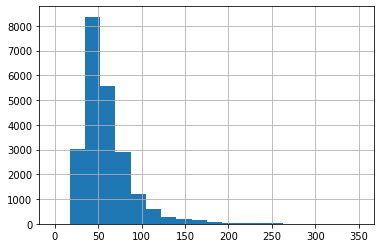

In [16]:
#постоим гистограмму для столбца общая площадь
data['total_area'].hist(bins = 20, range = (0, 350))

<AxesSubplot:>

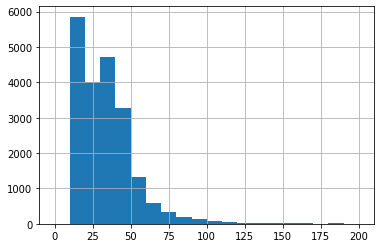

In [17]:
#постоим гистограмму для столбца жилая площадь
data['living_area'].hist(bins = 20, range = (0, 200))

<AxesSubplot:>

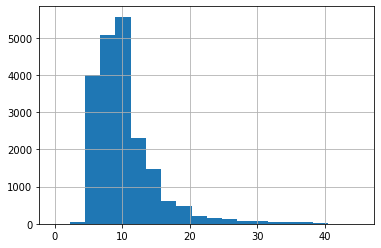

In [18]:
#постоим гистограмму для столбца площадь кухни
data['kitchen_area'].hist(bins = 20, range = (0, 45))

<AxesSubplot:>

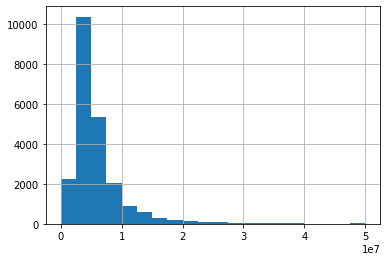

In [19]:
#постоим гистограмму для столбца цена объекта
data['last_price'].hist(bins = 20, range = (0, 50000000))

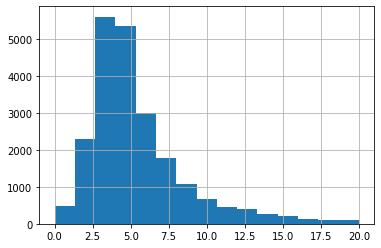

In [57]:
#код ревьюера
(data['last_price']/1000000).hist(range=(0, 20), bins=15);

<AxesSubplot:>

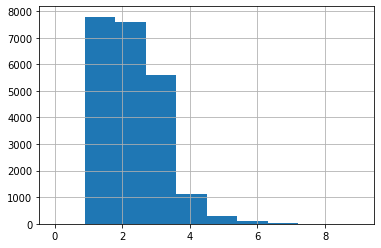

In [20]:
#постоим гистограмму для столбца количество комнат
data['rooms'].hist(bins = 10, range = (0, 9))

<AxesSubplot:>

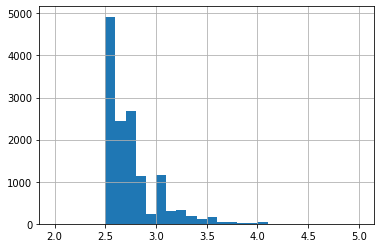

In [21]:
#постоим гистограмму для столбца высота потолков
data['ceiling_height'].hist(bins = 30, range = (2, 5))

<AxesSubplot:>

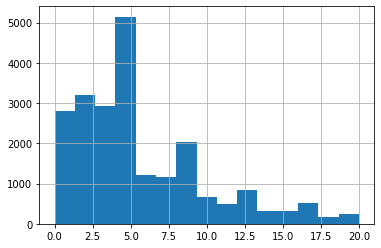

In [22]:
#постоим гистограмму для столбца этаж квартиры
data['floor'].hist(bins = 15, range = (0, 20))

<AxesSubplot:>

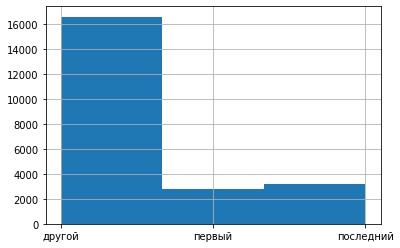

In [23]:
#постоим гистограмму для столбца тип этажа квартиры
data['floor_type'].hist(bins = 3)

<AxesSubplot:>

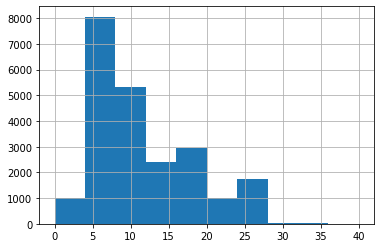

In [24]:
#постоим гистограмму для столбца общее количество этажей в доме
data['floors_total'].hist(bins = 10, range = (0, 40))

<AxesSubplot:>

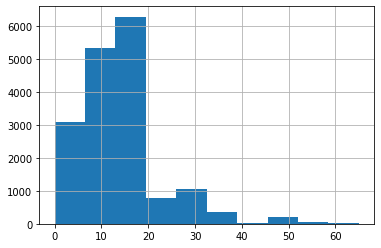

In [25]:
#постоим гистограмму для столбца расстояние до центра города
data['cityCenters_nearest'].hist(bins = 10)

<AxesSubplot:>

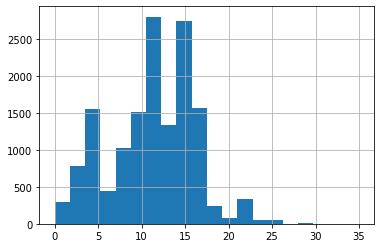

In [26]:
#постоим эту же гистограмму для Санкт-Петербурга
data.query('locality_name =="Санкт-Петербург"')['cityCenters_nearest'].hist(bins = 20, range = (0, 35))

<AxesSubplot:>

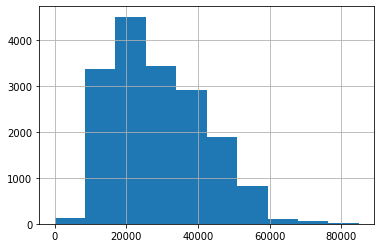

In [27]:
#постоим гистограмму для столбца расстояние до ближайшего аэропорта
data['airports_nearest'].hist(bins = 10)

<AxesSubplot:>

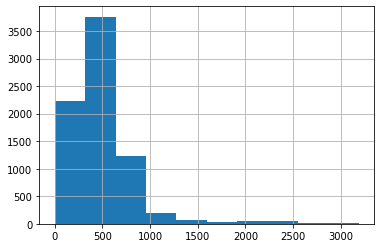

In [28]:
#постоим гистограмму для столбца расстояние до ближайшего парка
data['parks_nearest'].hist(bins = 10)

<AxesSubplot:>

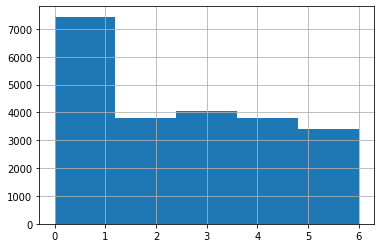

In [29]:
#постоим гистограмму для столбца день публикации объявления
data['day_week'].hist(bins = 5)

<AxesSubplot:>

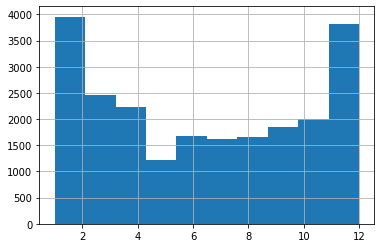

In [30]:
#постоим гистограмму для столбца месяц публикации объявления
data['month'].hist(bins = 10)

- общая площадь. имеет тип распределения Пуассона. пик значения приходится на 50кв.;
- жилая площадь. распределение не похоже на нормальное. причины - не ясны;
- площадь кухни. имеет тип распределения Пуассона. пик значения приходится на 8кв.;
- цена объекта. имеет тип распределения Пуассона;
- количество комнат. саме частые значение - 1 и 2. основная часть объектов в диапазоне между 1 и 4; 
- высота потолков. пик значений приходится на 2,7;
- этаж квартиры. большая часть объектов - на 5 этаже. глядя на этот график возникает ощущение ошибки ввода данных. потому что есть пики на 5, 9, 12 этажах - это типовая этажность домов. в то время как данный столбец должен содержать информацию не о количестве этажей в доме, а о том, на каком этаже расположен продаваемый объект. еще как вариант - объекты на последних этажах просто дольше продаются, поэтому их больше в общей массе. эти гипотезы нужно дополнительно проверять;
- тип этажа. больше всего вариантов с типом "другой этаж". на последних этажах квартир немногим больше, чем на первых;
- общее количество этажей в доме. больше всего объектов с 5-этажностью;
- расстояние до центра города. большая часть объектов расположена в пределах 20км от центра города. есть значения больше 40км. это странно. посмотрели отдельно Санкт-Петербург. у него значения до 25 км - что нормально. вероятно, значения в 60 км до центра города - ошибки. посчитано расстояние не до центра своего населенного пункта, а до центра ближайшего крупного города;  
- расстояние до аэропорта. часть объектов расположена очень близко к аэропорту. далее идет резкий скачек - с данными что-то не то. как мы помним, в данном столбце было много пропусков, вероятно, это сильно влияет на вид гистограммы; 
- расстояние до парка. пиковое значение - 500; 
- день публикации. чаще всего объявления публикуют в понедельник и вторник; 
- месяц публикации. пики (с большими отрывами) приходятся на декабрь и январь. май - существенное снижение активности. это можно объяснить тем, что у пользователей другие задачи, такие как подготовка к отпуску, к экзаменам, даче и др.

#### Длительность продажи квартир

Изучим данные о длительности продажи квартир и о факторах, влияющих на данный процесс.

<AxesSubplot:>

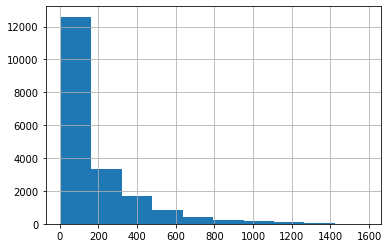

In [31]:
#построим гистограмму для столбца days_exposition
data['days_exposition'].hist(bins = 10)

In [32]:
#посмотрим на значения столбца методом describe ()
data['days_exposition'].describe()

count    19436.000000
mean       185.497833
std        220.008713
min          7.000000
25%         45.000000
50%        100.000000
75%        238.000000
max       1580.000000
Name: days_exposition, dtype: float64

(-100.0, 1000.0)

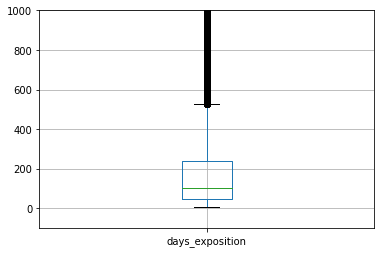

In [33]:
#добавим диаграмму размаха для данного столбца
import matplotlib.pyplot as plt
 
data.boxplot('days_exposition')
plt.ylim(-100, 1000)

<AxesSubplot:>

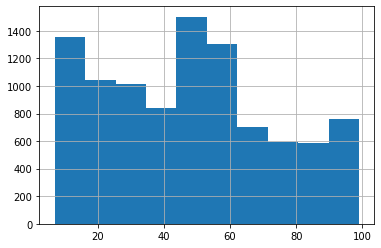

In [34]:
#посмотрим также на значения столбца через гистограмму. сделав при этом срез до 100 дней размещения объявления
data.query('days_exposition < 100')['days_exposition'].hist(bins = 10)

В среднем продажа занимает 185 дней, по медианному значению - 100 дней (порядка 3 месяцев). 
Все продажи до 45 дней можно считать быстрыми. Все что дольше 238 дней - долгими.
По диаграмме размаха мы видим большой хвост выбросов после 500 дня продажи. Максимлаьное значение - 1580. (возможно, пользователям с такой длительностью стоит предлагать активней методы доп рекламы объектов :) )
А также проверить, корректно ли настроена проверка актуальности продажи объекта. 

#### Факторы, влияющие на стоимость объекта

Изучим зависимость стоимости объекта от других параметров объекта.

<AxesSubplot:xlabel='last_price', ylabel='total_area'>

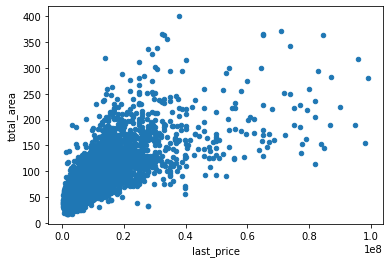

In [35]:
#построим график зависимости стоимости объекта и общей площади
data.plot(x= 'last_price', y= 'total_area', kind = 'scatter')

In [36]:
#расчитаем корреляцию
data['last_price'].corr(data['total_area'])

0.7573834286909008

<AxesSubplot:xlabel='last_price', ylabel='total_area'>

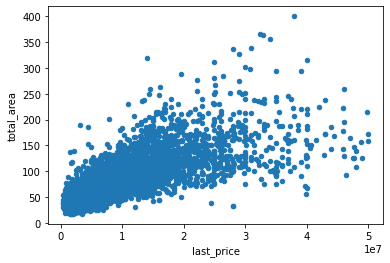

In [37]:
#у нас есть одно сильно выбивающееся значение. сделаем срез, посмотрим на график со значение по цене квартиры до 50млн
data.query('last_price < 50000000').plot(x= 'last_price', y= 'total_area', kind = 'scatter')

Зависимость между стоимостью жилья и общей площадью видна на графике и она подтверждается коэфициентом корреляции = 0,6.

<AxesSubplot:xlabel='last_price', ylabel='living_area'>

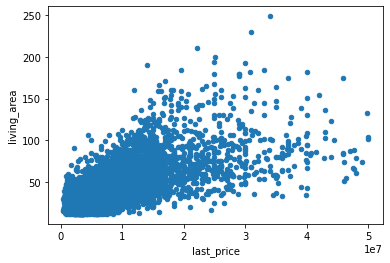

In [38]:
#построим график зависимости стоимости объекта и жилой площади. сразу сделаем срез по стоимости до 50млн
data.query('last_price < 50000000').plot(x= 'last_price', y= 'living_area', kind = 'scatter')

In [39]:
#расчитаем корреляцию
data['last_price'].corr(data['living_area'])

0.6767891189067408

Зависимость между стоимостью жилья и жилой площадью видна на графике и она подтверждается коэфициентом корреляции = 0,5.

<AxesSubplot:xlabel='last_price', ylabel='kitchen_area'>

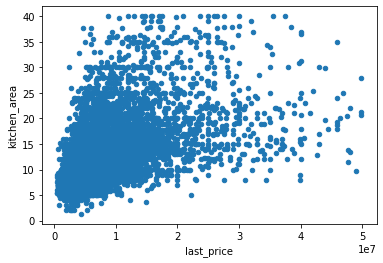

In [40]:
#построим график зависимости стоимости объекта и площади кухни
data.query('last_price < 50000000').plot(x= 'last_price', y= 'kitchen_area', kind = 'scatter')

In [41]:
#расчитаем корреляцию
data['last_price'].corr(data['kitchen_area'])

0.548620871596051

Зависимость между стоимостью объекта и площадью кухни есть. 

<AxesSubplot:xlabel='last_price', ylabel='rooms'>

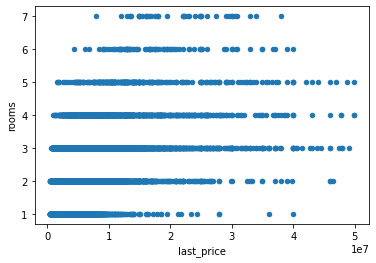

In [42]:
#построим график зависимости стоимости объекта c количеством комнат
data.query('last_price < 50000000').plot(x= 'last_price', y= 'rooms', kind = 'scatter')

In [43]:
#расчитаем корреляцию
data['last_price'].corr(data['rooms'])

0.4631949855583962

<AxesSubplot:title={'center':'Медианная стоимость объекта в разрезе типа этажа объекта'}, xlabel='Тип этажа', ylabel='Стоимость объекта'>

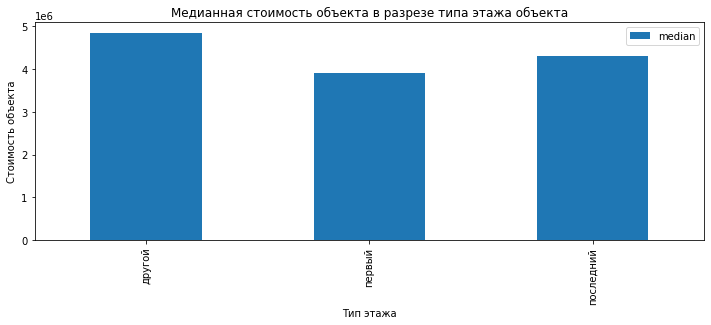

In [44]:
#создадим сводную таблицу для параметров стоимость объекта и тип этажа
last_price_floor_type = data.pivot_table(index= 'floor_type', values='last_price', aggfunc='median')
last_price_floor_type.columns = ['median']

#построим график типа bar 
last_price_floor_type.plot(y = 'median', kind = 'bar', figsize=(12, 4), title = 'Медианная стоимость объекта в разрезе типа этажа объекта', xlabel = 'Тип этажа', ylabel = 'Стоимость объекта')

По графику видно, что зависимость есть. Так, на первых этажах меньше объектов с высокой стоимостью жилья. Несколько больше их на последних. И больше всего их у объектов с "другим" этажом. 

<AxesSubplot:title={'center':'Медианная стоимость объекта в разрезе дней размещения объявления'}, xlabel='День размещения', ylabel='Стоимость объекта'>

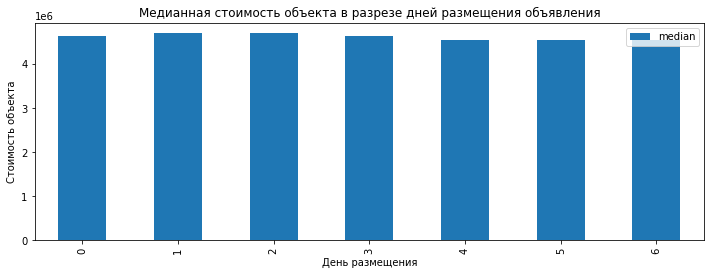

In [45]:
#создадим сводную таблицу для параметров стоимость объекта и день размещения объявления
last_price_day_week = data.pivot_table(index= 'day_week', values='last_price', aggfunc='median')
last_price_day_week.columns = ['median']

#построим график типа bar 
last_price_day_week.plot(y = 'median', kind = 'bar', figsize=(12, 4), title = 'Медианная стоимость объекта в разрезе дней размещения объявления', xlabel = 'День размещения', ylabel = 'Стоимость объекта')

Зависимости между днем размещения объявления и стоимостью объекта нет. 

<AxesSubplot:title={'center':'Медианная стоимость объекта в разрезе месяцев размещения'}, xlabel='Месяц размещения объявления', ylabel='Стоимость объекта'>

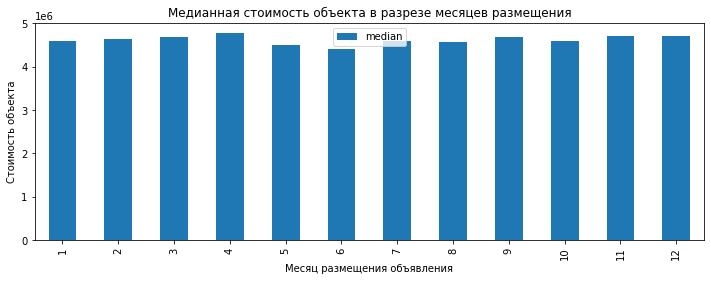

In [46]:
#создадим сводную таблицу для параметров стоимость жилья и месяц размещения объявления
last_price_month = data.pivot_table(index= 'month', values='last_price', aggfunc='median')
last_price_month.columns = ['median']

#построит график типа bar 
last_price_month.plot(y = 'median', kind = 'bar', figsize=(12, 4), title = 'Медианная стоимость объекта в разрезе месяцев размещения', xlabel = 'Месяц размещения объявления', ylabel = 'Стоимость объекта')

Зависимости между месяцем размещения объявления и стоимостью объекта нет. 

In [47]:
#посмотрим зависимость цены от года размещения объявления через сводные таблицы
year_last_price = data.pivot_table(index='year', values='last_price', aggfunc=['median', 'count'])
year_last_price

,median,count
,last_price,last_price
year,,
2014,7500000.0,132
2015,5250000.0,1148
2016,4500000.0,2710
2017,4500000.0,7776
2018,4599000.0,8059
2019,5100000.0,2697


Год к году наблюдалось снижение медианной стоимости объектов. Цена снижалась, а количество объектов росло. Вероятно, было активное подключение близлежайших населенных пунктов, где стоимость жилья несколько ниже. 

#### Населенные пукты с высокой и низкой стоимость кв.м.

In [48]:
#выведем ТОП-10 населенных пунктов с наибольшим числом объявлений
data['locality_name'].value_counts().head(10)

Санкт-Петербург      14874
посёлок Мурино         492
посёлок Шушары         424
Всеволожск             388
Пушкин                 347
Колпино                324
посёлок Парголово      302
Гатчина                295
деревня Кудрово        287
Выборг                 228
Name: locality_name, dtype: int64

In [49]:
#выведем сводную таблицу с данными по средней стоимости квадратного метра по населенным пунктам
mean_square_meter_locality = data.query('locality_name == "Санкт-Петербург" or locality_name == "посёлок Мурино" or locality_name == "посёлок Шушары" or locality_name == "Всеволожск" or locality_name == "деревня Кудрово" or locality_name == "Пушкин" or locality_name == "посёлок Парголово" or locality_name == "Колпино" or locality_name == "Гатчина" or locality_name == "Выборг" or locality_name == "посёлок Шушары"')
mean_square_meter_locality = mean_square_meter_locality.pivot_table(index= 'locality_name', values='meter_area_price', aggfunc=['mean', 'count'])
mean_square_meter_locality.columns = ['mean', 'count']
mean_square_meter_locality

,mean,count
locality_name,,
Всеволожск,68741.226562,388
Выборг,58015.621094,228
Гатчина,68735.796875,295
Колпино,75239.460938,324
Пушкин,102351.257812,347
Санкт-Петербург,113037.531250,14874
деревня Кудрово,92341.578125,287
посёлок Мурино,85486.859375,492
посёлок Парголово,89553.414062,302


In [50]:
#выведем минимальное значение
mean_square_meter_locality['mean'].min()

58015.62

In [51]:
#выведем максимальное значение
mean_square_meter_locality['mean'].max()

113037.53

<AxesSubplot:title={'center':'Средняя стоимость 1кв м для ТОП-10 населенных пунктов'}, xlabel='Населенный пункт', ylabel='Стоимость 1 кв м'>

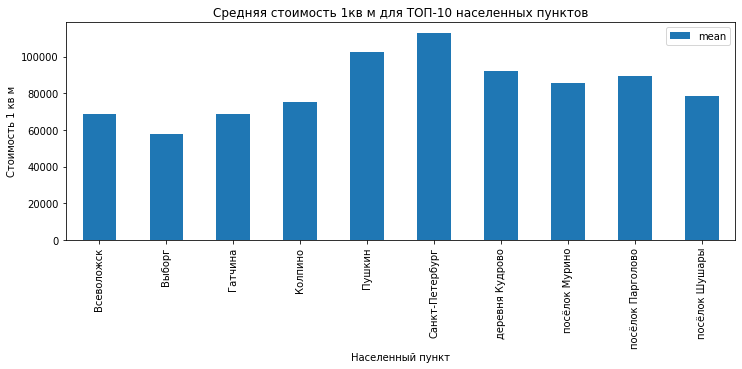

In [52]:
#построим график по данным сводной таблицы 
mean_square_meter_locality.plot(y = 'mean', kind = 'bar', figsize=(12, 4), title = 'Средняя стоимость 1кв м для ТОП-10 населенных пунктов', xlabel = 'Населенный пункт', ylabel = 'Стоимость 1 кв м')

Наименьшая стоимость квадратного метра в Выборге (58015). Максимальная в Санкт-Петербурге (113994)

#### Зависимость стоимости объекта от расстояния до центра города

In [53]:
#сделаем срез данных по локации "Санкт-Петербург" и создадим сводную таблицу. в индекс постами расстояние до центра, в выводимые данне - среднее по стоимости 1кв.метра)
data_spb_group = (
    data
    .query('locality_name == "Санкт-Петербург"')
    .pivot_table(index = 'cityCenters_nearest', values = 'meter_area_price', aggfunc='mean')
)
data_spb_group.columns = ['mean']

#выведем полученную таблицу
data_spb_group

,mean
cityCenters_nearest,
0.0,169846.593750
1.0,146048.500000
2.0,138103.328125
3.0,123967.828125
4.0,134907.437500
5.0,139577.937500
6.0,147654.281250
7.0,137450.703125
8.0,119791.296875


<AxesSubplot:title={'center':'Цена 1 кв м для каждого километра удаленности от центра'}, xlabel='Расстояние до центра города, км', ylabel='Стоимость 1кв м'>

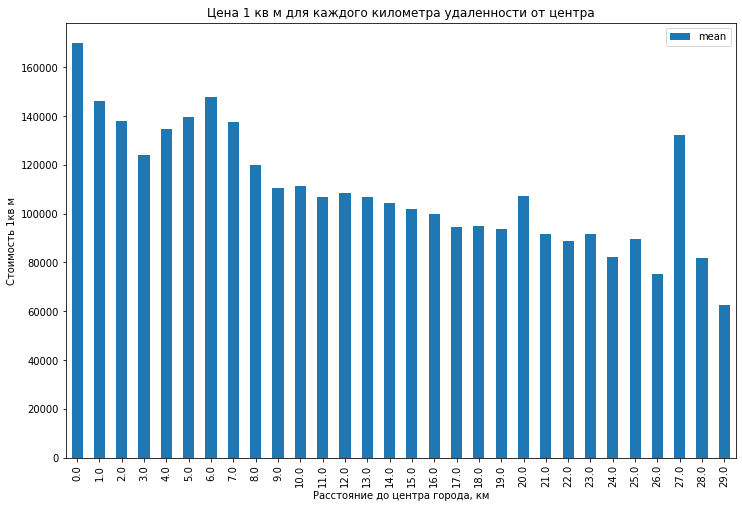

In [54]:
#выведем график по полученной таблице. график покажет среднюю стоимоть квадратного метра жилья в зависимости от удаленности от центра города. будем использовать столбчатую диаграмму
data_spb_group.plot(y = 'mean', kind = 'bar', figsize=(12, 8), title = 'Цена 1 кв м для каждого километра удаленности от центра', xlabel = 'Расстояние до центра города, км', ylabel = 'Стоимость 1кв м')

Стоимость кв метра зависит от приблеженность объекта к центру города. Самая высокая стоимость у объектов в пределах 1 км от центра. График нисходящий, но есть скачки на 5км и 27км. Вероятно, на этой удаленности расположены элитные жилые комплексы. 

### Общий вывод

#### Подготовительный этап
В ходе исследования нами были обработаны данные, полученные из файла 'real_estate_data.csv'. Данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет.

В ходе исследования на предварительном этапе были проведены следующие работы:
- заполнены пропуски в столбце balcony;
- удаленены пропуски в floors_total;
- изменены типы данных для first_day_exposition и floors_total;
- измненен тип данных с float64 на float32 для всех столбцов с таким типом данных;
- обработаны неявные дубликаты в locality_name;
- обработаны аномальные значения в total_area, rooms, last_price, ceiling_height, floors_total, living_area, kitchen_area, days_exposition; 
- все аномальные значения были удаленены. всего было удаленено порядка 5% данных. 

Для полноты анализа были добавлены новые столбцы: 
- цена за квадратный метр;
- день недели публикации объявления;
- месяц публикации объявления;
- год публикации объявления;
- тип этажа квартиры (первый/последний/другой).

#### Выводы по целям исследования
Общие выводы:
- общая площадь. имеет тип распределения Пуассона. пик значения приходится на 50кв.;
- жилая площадь. распределение не похоже на нормальное. причины - не ясны;
- площадь кухни. имеет тип распределения Пуассона. пик значения приходится на 8кв.;
- цена объекта. имеет тип распределения Пуассона;
- количество комнат. самые частые значение - 1 и 2. основная часть объектов в диапазоне между 1 и 4; 
- высота потолков. пик значений приходится на 2,7;
- этаж квартиры. большая часть объектов - на 5 этаже. глядя на этот график возникает ощущение ошибки ввода данных. потому что есть пики на 5, 9, 12 этажах - это типовая этажность домов. в то время как данный столбец должен содержать информацию не о количестве этажей в доме, а о том, на каком этаже расположен продаваемый объект. еще как вариант - объекты на последних этажах просто дольше продаются, поэтому их больше в общей массе. эти гипотезы нужно дополнительно проверять;
- тип этажа. больше всего вариантов с типом "другой этаж". на последних этажах квартир немногим больше, чем на первых;
- общее количество этажей в доме. больше всего объектов с 5-этажностью;
- расстояние до центра города. большая часть объектов расположена в пределах 20км от центра города. есть значения больше 40км. это странно. посмотрели отдельно Санкт-Петербург. у него значения до 25 км - что нормально. вероятно, значения в 60 км до центра города - ошибки. посчитано расстояние не до центра своего населенного пункта, а до центра ближайшего крупного города;  
- расстояние до аэропорта. часть объектов расположена очень близко к аэропорту. далее идет резкий скачек - с данными что-то не то. как мы помним, в данном столбце было много пропусков, вероятно, это сильно влияет на вид гистограммы; 
- расстояние до парка. пиковое значение - 500; 
- день публикации. чаще всего объявления публикуют в понедельник и вторник; 
- месяц публикации. пики (с большими отрывами) приходятся на декабрь и январь. май - существенное снижение активности. это можно объяснить тем, что у пользователей другие задачи, такие как подготовка к отпуску, к экзаменам, даче и др.

Изучена длительность продажи квартир: 
- в среднем продажа занимает 185 дней; 
- по медианному значению - 100 дней (порядка 3 месяцев); 
- все продажи до 45 дней можно считать быстрыми; 
- все продажи дольше 238 дней - долгие;
По диаграмме размаха мы видим большой хвост выбросов после 500 дня продажи. Максимальное значение - 1580. (возможно, пользователям с такой длительностью стоит предлагать активней методы доп рекламы объектов :) )
А также проверить, корректно ли настроена проверка актуальности продажи объекта.

Изучены факторы, влияющие на стоимость квартиры: 
- зависимость между стоимостью жилья и общей площадью видна на графике и она подтверждается коэфициентом корреляции = 0,6;
- зависимость между стоимостью жилья и жилой площадью видна на графике и она подтверждается коэфициентом корреляции = 0,5;
- есть зависимость между стоимостью объекта и площадью кухни; 
- есть зависимость между стоимость жилья и типом этажа. Так, на первых этажах меньше объектов с высокой стоимостью жилья. Несколько больше их на последних. И больше всего их у объектов с "другим" этажом; 
- другие зависимости не выявленены. 

Изучена стоимость кв м по населенным пунктам:
- наименьшая стоимость квадратного метра в Выборге (58015); 
- максимальная стоимость квадратного метра в Санкт-Петербурге (113994).

Установлена зависимость между стоимостью кв м и расстоянием по центра города:
- стоимость кв метра зависит от приблеженность объекта к центру города. 
- самая высокая стоимость у объектов в пределах 1 км от центра. 
- данные графика нисходящие, но есть скачки на 5км и 27км. Вероятно, на этой удаленности расположены элитные жилые комплексы. 


#### Рекомендации по работе с данными
- потерянные данные относятся к картографическим. Необходимо поставить задачу в it отдел, с целью проверки причин отсутствия данных, либо настройки их автоматичесого вывода (возможно, по данным населенным пунктам работы не были проведенены до конца, то есть, например, не настроен расчет расстояния до озера в "Ломоносово");

- отсутствие данных в столбце "аппартаменты" - относится к данным добавленным пользователем. Возможно, заполнение данного столбца не является обязательным при заполнении карточки объявления. Также данные о типе дома, возможно, есть в открытых источниках - возможно, it отдел сможет автоматически подтянуть эти данные к сервису. Необходимо это поправить, т.к. тип жилья является весомым фактором при выборе объекта и может иметь сильные взаимосвязи с другими параметрами объекта;

- добавить на сайт классификатор населенных пунктов. либо провести проверку текущего классификатора на предмет неявных дубликатов;

- в столбце days_exposition есть данные равные 1,2,3 (и тд) дням. Желательно добавить форму опроса пользователей при снятии объявления с размещения о причинах снятия. Возможные причины: продажа, ошибка размещения, передумал продавать и др. 